###Avaliação de Desempenho

Conjunto de Dados - Dataset COVID, FLU, COLD Symptoms - [Download](https://drive.google.com/file/d/15_WvzvIN5bjyxMttJxCt48hFPjfz2Ts_/view?usp=sharing)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
import pandas as pd

import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv('/content/covid.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [ ]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [ ]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,ALLERGY


FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


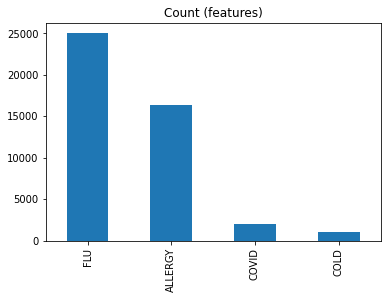

In [ ]:
#Verificando o desbalanceamento

features = df.TYPE.value_counts()
print(features)
features.plot(kind='bar', title='Count (features)');

In [ ]:
# dataset - divisão em conjunto de treino e teste 
X = df.drop('TYPE', axis=1)
y = df.TYPE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Desbalanceamento 
print(y_train.value_counts())

FLU        18742
ALLERGY    12271
COVID       1541
COLD         785
Name: TYPE, dtype: int64


In [ ]:
model1 = GaussianNB()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier(n_neighbors = 5)

modelo_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3)]) 

modelo_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())])

In [ ]:
modelo_ensemble.score(X_test, y_test)

0.8977865754903726

TESTE 1: Treinando o modelo utilizando o conjunto de treino com as classes desbalanceadas

Classification Report

```
Precisão (precision) - dentre todas as classificações Verdadeiros Positivos que o modelo fez, quantas estão corretas.
```

In [ ]:
modelo_ensemble.fit(X_train,y_train)
y_pred = modelo_ensemble.predict(X_test)
print(classification_report(y_test, y_pred)) #avaliação

              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      4110
        COLD       0.36      0.46      0.40       239
       COVID       0.29      0.37      0.32       507
         FLU       0.94      0.91      0.93      6258

    accuracy                           0.90     11114
   macro avg       0.64      0.68      0.66     11114
weighted avg       0.91      0.90      0.90     11114



TESTE 2: Treinando o modelo e aplicando a abordagem Sampling para lidar com as classes desabalanceadas

In [ ]:
# técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts()) #divisão conjunto de dados desbalanceada

print(y_res.value_counts()) #divisão conjunto de dados após undersample

In [ ]:
modelo_ensemble.fit(X_res, y_res)
y_pred = modelo_ensemble.predict(X_test)

print(classification_report(y_test, y_pred)) 

###Utilizar o Classification Report para avaliar o resultado individual dos métodos de classificação

In [ ]:
# KNN, Naive Bayes e Àrvores de Decisão 
# Analisar o resultados (sem reamostragem, com reamostragem - balanceamento)
# Utilizando o dataset COVID
# Aplicar Validação Cruzada para obter diferentes versões do conjunto teste e treinamento